<a href="https://colab.research.google.com/github/stephenlok/Learning/blob/main/dual_moving_average_crossover_TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as ny
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA.csv


In [9]:
TSLA = pd.read_csv('TSLA.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-18,61.400002,62.787998,61.062000,62.612000,62.612000,28269000
1,2017-05-19,63.099998,63.299999,62.040001,62.166000,62.166000,23438000
2,2017-05-22,62.560001,62.874001,61.360001,62.070000,62.070000,21646000
3,2017-05-23,62.091999,62.146000,60.695999,60.771999,60.771999,21592000
4,2017-05-24,61.301998,62.200001,61.080002,62.043999,62.043999,25166500
...,...,...,...,...,...,...,...
1254,2022-05-11,795.000000,809.770020,727.200012,734.000000,734.000000,32408200
1255,2022-05-12,701.000000,759.659973,680.000000,728.000000,728.000000,46771000
1256,2022-05-13,773.479980,787.349976,751.570007,769.590027,769.590027,30651800
1257,2022-05-16,767.159973,769.760010,719.090027,724.369995,724.369995,28699500


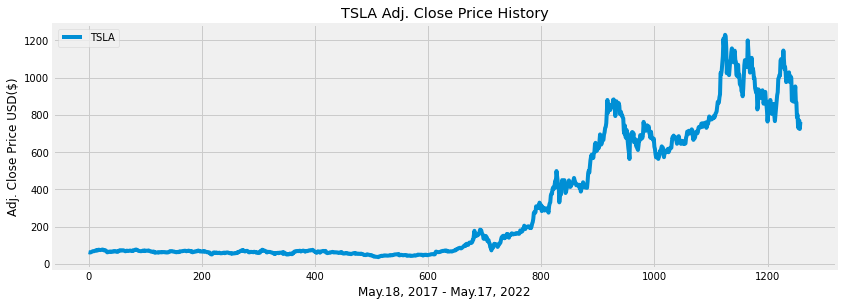

In [10]:
plt.figure(figsize=(12.5,4.5))
plt.plot(TSLA['Adj Close'], label = "TSLA")
plt.title('TSLA Adj. Close Price History')
plt.xlabel('May.18, 2017 - May.17, 2022')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [11]:
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = TSLA ['Adj Close'].rolling(window= 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,964.807666
1255,952.608000
1256,942.341001
1257,930.333669


In [12]:
SMA100= pd.DataFrame()
SMA100['Adj Close'] = TSLA ['Adj Close'].rolling(window= 100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,949.481796
1255,947.436096
1256,946.132596
1257,943.990995


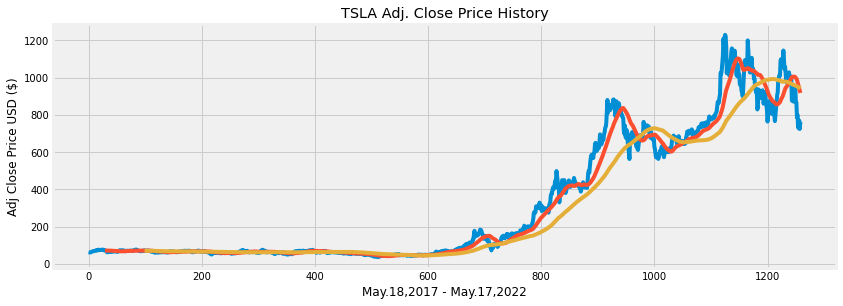

In [13]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('TSLA Adj. Close Price History')
plt.xlabel('May.18,2017 - May.17,2022')
plt.ylabel('Adj Close Price USD ($)')
plt.show()

In [14]:
data = pd.DataFrame()
data['TSLA'] = TSLA['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,TSLA,SMA30,SMA100
0,62.612000,NaN,NaN
1,62.166000,NaN,NaN
2,62.070000,NaN,NaN
3,60.771999,NaN,NaN
4,62.043999,NaN,NaN
...,...,...,...
1254,734.000000,964.807666,949.481796
1255,728.000000,952.608000,947.436096
1256,769.590027,942.341001,946.132596
1257,724.369995,930.333669,943.990995


In [41]:
import numpy as np

def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
         if flag != 0:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(data['TSLA'][i])
           flag = 0
         else: 
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(np.nan)
    else:
           sigPriceBuy.append(np.nan)
           sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)


In [42]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [43]:
data

,TSLA,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,62.612000,NaN,NaN,NaN,NaN
1,62.166000,NaN,NaN,NaN,NaN
2,62.070000,NaN,NaN,NaN,NaN
3,60.771999,NaN,NaN,NaN,NaN
4,62.043999,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,734.000000,964.807666,949.481796,NaN,NaN
1255,728.000000,952.608000,947.436096,NaN,NaN
1256,769.590027,942.341001,946.132596,NaN,769.590027
1257,724.369995,930.333669,943.990995,NaN,NaN


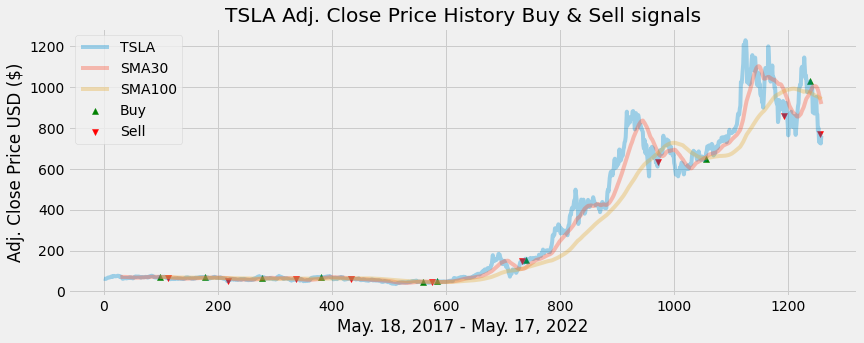

In [51]:
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['TSLA'], label = 'TSLA', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('TSLA Adj. Close Price History Buy & Sell signals')
plt.xlabel('May. 18, 2017 - May. 17, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

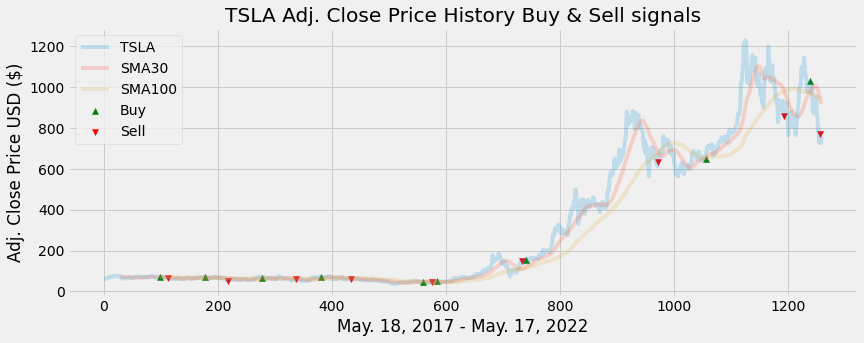

In [55]:
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['TSLA'], label = 'TSLA', alpha = 0.2)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.2)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.2)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('TSLA Adj. Close Price History Buy & Sell signals')
plt.xlabel('May. 18, 2017 - May. 17, 2022')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()